# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

#Prologue
Previous studies have implicated a correlation between ramping spike activity in LIP cortial neurons and behavioural responses of decision making (accuracy and reaction times). Here, a simplified two-variable model of a biophysically realistic cortical network is presented as a neuronal basis of temporal decision making. 

# Appendix Model
## Reduced two-variable model without AMPA at recurrent synapses
The reduced two-variable model is in its simplest form if we
assume that NMDA receptors primaraly give rise to excitatory reverberation at recurrent synapses. This model excludes caluclations for the much faster AMPA and GABA_A receptors. 

### Calling Library Fuctions

In [29]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model
#### Input-output function
$$ H_i=\frac{a x_i-b}{(1-exp[-d(ax_i-b)]}$$

#### Parameter values
$$ a=207 (VnC)^{-1},$$
$$ b=108Hz,$$
$$ d=0.154s$$

In *Wang (2006)*, $r_i$, the firing rate, is a self-consisting nonlinear function dependant on both the inputs from leftward and rightward firing rate populations, $r_i$, as well as sensory inputs, $I$. Rather than approximating the values itterivly in a costly computational  mannor, $H_i$ is introduced as a simplification of the firing rate equation. The input-output function, $H_i$, can be solved for any $x_i$ as defined in the following section's equations. The parameter values for $a$, $b$ and $d$ are chosen to fit the numerical solutions.

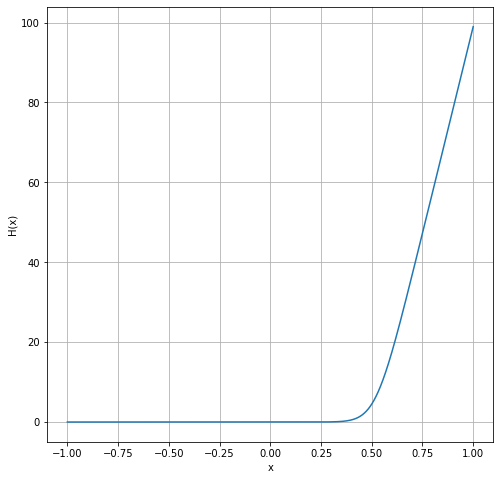

In [30]:
def H(x):
    a=207
    b=108
    d=0.154
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f

x=np.arange(-1,1,0.0001)
fig = plt.figure(figsize=(8,8))
plt.plot(x,H(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('H(x)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


**Figure 1.** Plott showing evolution of firing rate variable $H(x)_i$ as a function of values of $x_i$ from $-1$ to $1$. Firing rate is a ramping function. 

### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,2}$$

where the synaptic couplings are$J_{11}=J_{22}=0.2609$ and $J_{12}=J_{21}=0.0497$. 
$I_{0}=0.3255 nA$ represents external input 


In [31]:
def total_synaptic_current(S_1,S_2,I_1,I_2,I_noise_1,I_noise_2):
    # Synaptic coupling
    J_11=0.2609 # nA
    J_22=0.2609 # nA
    J_12=0.0497 # nA
    J_21=0.0497 # nA
    I_0=0.3255  # nA
    x_1=J_11*S_1-J_12*S_2+I_0+I_1+I_noise_1
    x_2=J_22*S_2-J_21*S_1+I_0+I_2+I_noise_2
    return x_1, x_2


$I_i$ for $i=1,2$ represents sensory input from the stimulius in its respective direction and dependens on cohereance. $I_{noise,i}$ is an added input noise term discussed in the below section. $I_0$ is the mean external input common to both populations. 

### Background activity
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$
$$ \tau_{AMPA}=2ms,$$
$$ \sigma_{noise}=0.02,$$
$$ \eta- white \ noise $$

Simplyfing the model removes the noise term describing input from neurons outside the  left and right motion sensitive populations. Here, background activity, $I_{noise,i}$, is introduced conisting of Gaussian white noise with zero mean and unit variance filtered by a short (AMPA synaptic) time constant.

In [32]:
def Background_Activity(I_noise,h):
    sigma_noise=0.02 # nA
    tau_AMPA=2#ms
    eta_noise=np.random.normal(0,1,1)
    I_0=0.0#3255  # nA
    I_noise_new=I_noise+(h)/tau_AMPA*(-(I_noise-I_0)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =\frac{-S_{i}}{\tau_S}+\big((1-S_i)\gamma H(x_i)\big)$$
$$\tau_S=100ms$$
$$\tau_S=0.1s$$
$$\gamma=0.641$$

Euler 
w_{i+1}

The equation above describes a reduced two-varable system of excititory populations, $i={1,2}$ ($1$ = right; $2$ = left). The evolution of the system is dependant on the synaptic gating variable and time constant for NMDA receptors, $S_{NMDA}$ and $τ_{NMDA}$, denoted $S$ and $τ_S$ here for short, as well as the input-outpuut function described earlier. 

In [33]:
def S_diff(S,x,h):
    tau_S=100/1000#100 #ms
    𝛾=0.641
    S_new=S+h/1000*((-S/tau_S)+(1-S)*𝛾*H(x))
    return S_new


### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1\pm \frac{c'}{100} \right) $$

$$\mu=30$$ Hz- spikes per second
$$ f=1$$  Only in Wong et al 2007
$$ J_{A,ext}=5.2 \times 10^{-4}$$
$$ c' $$ Coherence

$I_i$ represents encoded motion stimulus information from the MT area. This input is dependant on the strength and direction of the cohearence, $c'$, aboslute stimulius strength $μ_0$ and the average synaptic coupling with AMPA receptors, $J_{A,ext}$. 

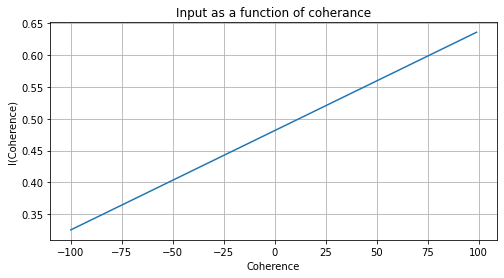

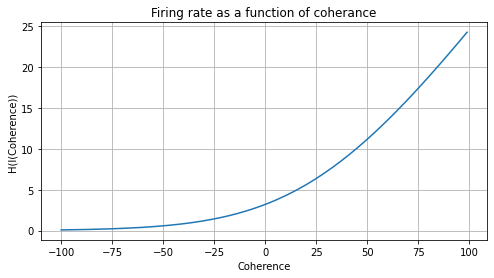

In [34]:
def I_input_1(c_dash):
    J_A_ext=5.2/1000# nA/Hz
    mu_0=30 # Hz
    f=1
    I_motion=J_A_ext*mu_0*(1+f*(c_dash)/100)
    return I_motion

All_coh=np.arange(-100,100,1)
fig = plt.figure(figsize=(8,4))
plt.plot(All_coh,I_input_1(All_coh)+0.3255)
plt.grid()
plt.xlabel('Coherence')
plt.ylabel('I(Coherence)')
plt.title("Input as a function of coherance")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig = plt.figure(figsize=(8,4))
plt.title("Firing rate as a function of coherance")
plt.plot(All_coh,H(I_input_1(All_coh)+0.3255))
plt.grid()
plt.xlabel('Coherence')
plt.ylabel('H(I(Coherence))')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#NOTE
#Not sure if I've got the gist of this section right. Are the below graphs Input and firing rate vs cohearance?
#I changed the y-axis on the second one from I(Coh) to H(I(coh)) 
#[based on this line plt.plot(All_coh,H(I_input_1(All_coh)+0.3255))] 
#but H is a function of x... not just I?


# Initial Conditions

In [35]:
h=0.1
time=np.arange(-1000,3000,h)
J_A_ext=5.2/1000 # nA/Hz
mu_0=30.0
I_noise_1=0.004*np.random.normal(0,1,len(time))
I_noise_2=0.004*np.random.normal(0,1,len(time))

x_1=J_A_ext*mu_0*np.ones(len(time))
x_2=J_A_ext*mu_0*np.ones(len(time))



S=0.5
S_1=S+np.random.uniform(0,0.001,len(time))
S_2=S+np.random.uniform(0,0.001,len(time))

I_1=np.zeros((len(time)))
I_2=np.zeros((len(time)))


In [36]:
COHERENCE_LEVEL=2

for i in range (0,len(time)-1):
    ## INPUT
    if time[i] >=0 and time[i]<200:
        c_dash=COHERENCE_LEVEL
    elif time[i] >=300 and time[i]<1500:
        c_dash=5
    else:
        c_dash=0.0
    
    
    I_noise_1[i+1]=Background_Activity(I_noise_1[i],h)
    I_noise_2[i+1]=Background_Activity(I_noise_2[i],h)
    
    I_1[i+1]=I_input_1(c_dash)
    I_2[i+1]=I_input_1(-c_dash)
   
    x_1[i+1],x_2[i+1]=total_synaptic_current(S_1[i],S_2[i],I_1[i],
                                      I_2[i],I_noise_1[i],I_noise_2[i])
    S_1[i+1]=S_diff(S_1[i],x_1[i],h)
    S_2[i+1]=S_diff(S_2[i],x_2[i],h)
   


### Plotting


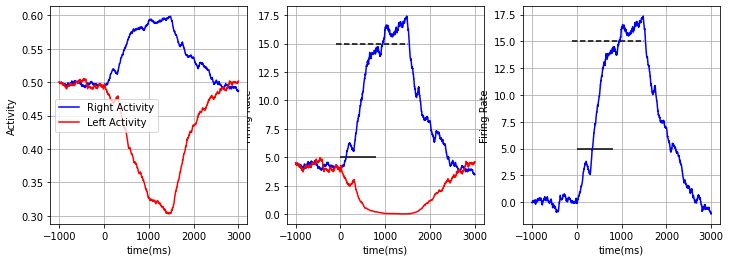

In [37]:
fig = plt.figure(figsize=(12,4))
plt.subplot(132)

plt.plot(time,H(S_1),'-',color='blue',label="Right")
plt.plot(time,H(S_2),'-',color='red',label="Left")
plt.hlines(15,-100,1500,linestyles='dashed')
plt.hlines(5,0,800)

plt.grid()
#plt.xlim((-100,1500))
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.subplot(133)

plt.plot(time,H(S_1)-H(S_2),'-',color='blue',label="Right-Left")
plt.hlines(15,-100,1500,linestyles='dashed')
plt.hlines(5,0,800)

plt.grid()
#plt.xlim((-100,1500))
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate')



plt.subplot(131)
plt.plot(time,S_1,'-',color='blue',label='Right Activity')
plt.plot(time,S_2,'-',color='red',label='Left Activity')

#plt.plot([0,1],[0,1],':k')
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Activity')
#plt.xlim((-100,1500))

plt.legend()

plt.show()


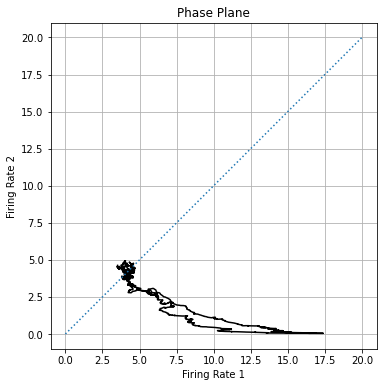

In [38]:
Firing_target_1=H(S_1)
Firing_target_2=H(S_2)

fig = plt.figure(figsize=(6,6))
plt.plot(Firing_target_1,Firing_target_2,'-',color='black')


plt.plot([0,20],[0,20],':')
plt.grid()
plt.xlabel('Firing Rate 1')
plt.ylabel('Firing Rate 2')
plt.title('Phase Plane')
plt.axis('square')
plt.show()



## References
Wong KF, Wang XJ. A recurrent network mechanism of time integration in perceptual decisions. J Neurosci. 2006 Jan 25;26(4):1314-28. doi: 10.1523/JNEUROSCI.3733-05.2006. PMID: 16436619; PMCID: PMC6674568.